In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
infected = pd.read_csv('time_series_covid19_confirmed_global.csv')
recovered = pd.read_csv('time_series_covid19_recovered_global.csv')
deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
countries = pd.read_csv('UID_ISO_FIPS_LookUp_Table.csv')

In [117]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

In [36]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

In [84]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

def mkRt(country):
    country['ninfected'] = country['infected'].diff()
    country['Rt'] = country['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
    return country['Rt']

df = mkframe('US')
cn = mkframe('China')
ng = mkframe('Nigeria')
it = mkframe('Italy')
br = mkframe('Brazil')

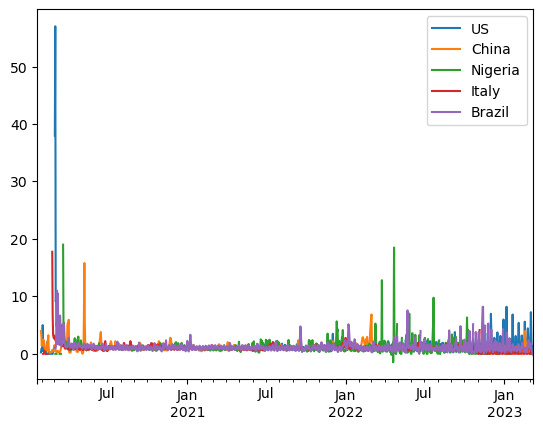

In [96]:
Us = mkRt(df)
China = mkRt(cn)
Nigeria = mkRt(ng)
Italy = mkRt(it)
Brazil = mkRt(br)

Us.plot(label='US')
China.plot(label='China')
Nigeria.plot(label='Nigeria')
Italy.plot(label='Italy')
Brazil.plot(label='Brazil')

plt.legend()
plt.show()

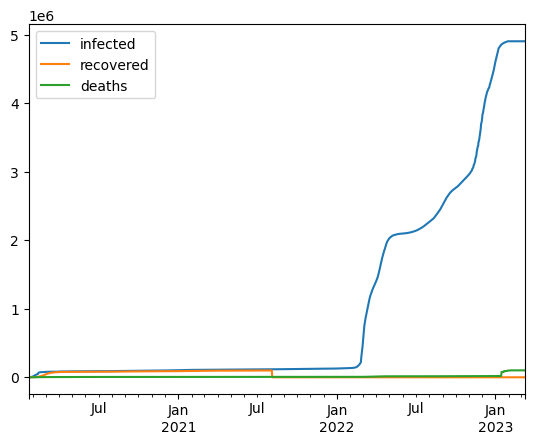

In [102]:
mkframe('China').plot()
plt.show()

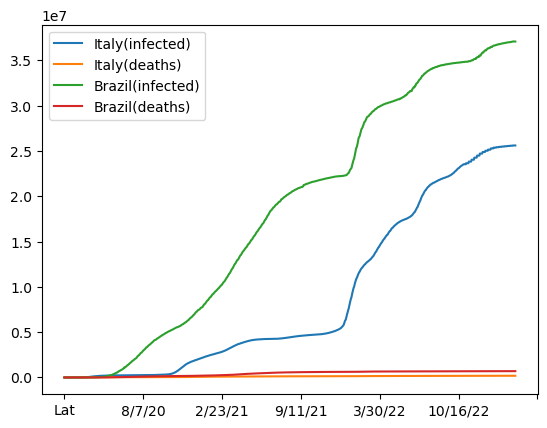

In [118]:
infected.loc['Italy'].plot(label='Italy(infected)')
deaths.loc['Italy'].plot(label='Italy(deaths)')
infected.loc['Brazil'].plot(label='Brazil(infected)')
deaths.loc['Brazil'].plot(label='Brazil(deaths)')

plt.legend()
plt.show()

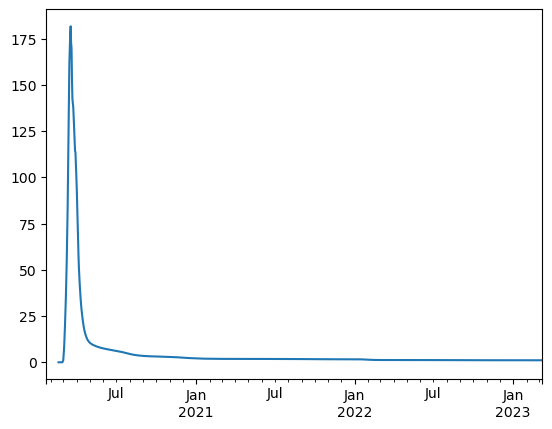

In [120]:
df['fatality_rate'] = (df['deaths'].cumsum() - df['deaths'].cumsum().shift(14)) / (df['infected'].cumsum().shift(14) - df['infected'].cumsum().shift(14).shift(14)) * 100
df['fatality_rate'].plot()
plt.show()
